<a href="https://colab.research.google.com/github/ringaringa99/IT/blob/main/%EC%8B%9C%EA%B0%81%ED%99%94%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%matplotlib inline
import pandas as pd
import seaborn as sns

In [5]:
#https://seaborn.pydata.org/tutorial/aesthetics.html

sns.set_style("whitegrid")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd

health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health_data.csv")
display(health.head)
print(health.info())




<bound method NDFrame.head of       기준년도  가입자일련번호  시도코드 성별코드  연령대코드(5세단위)  신장(5Cm단위)  체중(5Kg 단위)   허리둘레  \
0     2020        1    36    M            9        165          60   72.1   
1     2020        2    27    F           13        150          65   81.0   
2     2020        3    11    F           12        155          55   70.0   
3     2020        4    31    M           13        160          70   90.8   
4     2020        5    41    F           12        155          50   75.2   
...    ...      ...   ...  ...          ...        ...         ...    ...   
9995  2020     9996    44    F           13        155          55   83.0   
9996  2020     9997    43    F           11        160          55   77.5   
9997  2020     9998    45    M           12        160          80   93.0   
9998  2020     9999    27    F           15        155          55   78.0   
9999  2020    10000    45    F           13        160          75  100.0   

      시력(좌)  시력(우)  ...  혈청크레아티닌  (혈청지오티)AST 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [56]:


import pandas as pd
health.rename(columns={'LDL콜레스테롤':'LDL', '허리둘레':'waist', '체중(5Kg 단위)':'weight'}, inplace=True)


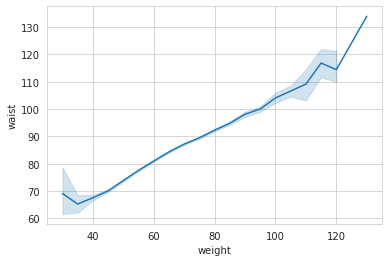

In [11]:
sns.lineplot(data = health, x = 'weight', y = 'waist')

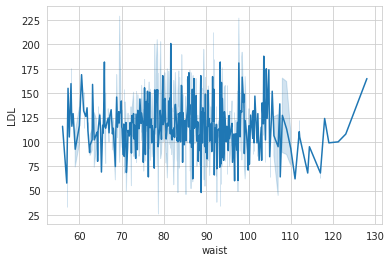

In [16]:
sns.lineplot(data = health, x = 'waist', y = 'LDL')

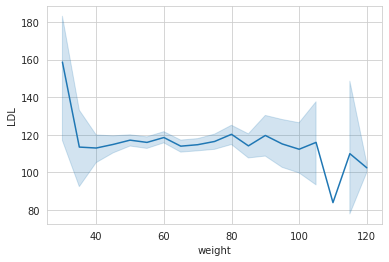

In [15]:
sns.lineplot(data = health, x = 'weight', y = 'LDL')

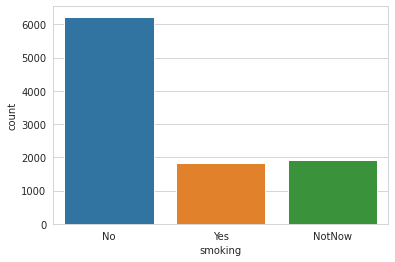

In [55]:

health.rename(columns={'흡연상태':'smoking', '음주여부':'drinking'}, inplace=True)
sns.countplot(data = health, x = 'smoking')


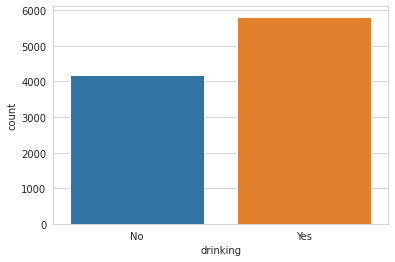

In [42]:
sns.countplot(data = health, x = 'drinking')

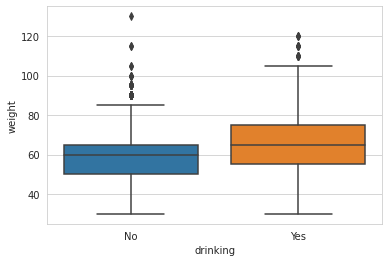

In [49]:
import pandas as pd
sns.boxplot(data = health, x = 'drinking', y = 'weight')


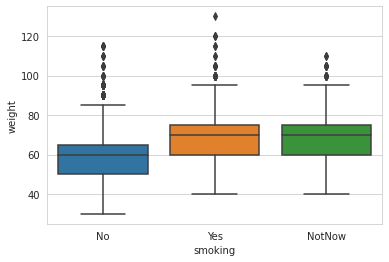

In [50]:
sns.boxplot(data = health, x = 'smoking', y = 'weight')

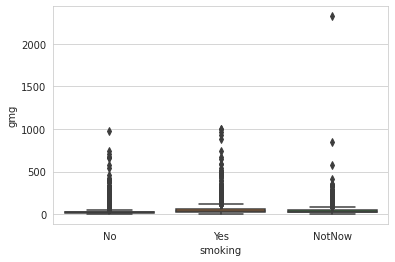

In [53]:
health.rename(columns={'감마지티피':'gmg'}, inplace=True)
sns.boxplot(data = health, x = 'smoking', y = 'gmg')

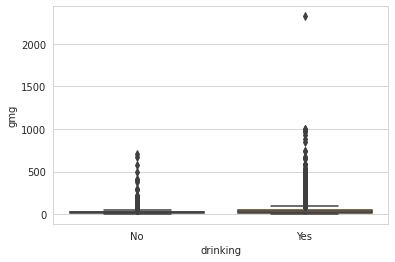

In [54]:
sns.boxplot(data = health, x = 'drinking', y = 'gmg')

#인사이트1  
LDL 콜레스테롤과 허리둘레와의 상관관계를 알아봤다. LDL콜레스테롤이란 입자가 매우 큰 콜레스테롤로, 양이 과도하게 증가할 경우, 혈관벽에 쌓여서 동맥경화나 각종 질병을 야기하는 성분을 의미한다.  
분석 전, 허리둘레가 클 수록 복부지방이 많거나, 이로 인해 몸무게가 많이 나간다는 것을 가정했고, 이를 증명하기 위해 몸무게와 허리둘레의 상관관계를 선 그래프를 통해 알아봤다. 이는 비례곡선을 띄고 있어 그러한 것으로 증명되었다.  
다음으로 콜레스테롤 수치가 높다는 것은, 지방이 많다는 것인지, 또 그러하다면 다이어트로 몸무게를 감량한다면 콜레스테롤 양이 줄어드는 것인지 알아보고자하였다. 이를 위해 x축에 허리둘레, y축에 LDL콜레스테롤을 입력하였는데, 선이 기울기가 없고, 동등하게 다양한 분포탓에 직선의 형태를 띄고 있었다. 이로, 허리둘레, 또 몸무게와 LDL콜레스테롤과의 연관성이 없다고 판단했다.  
마지막으로, 허리둘레와 LDL콜레스테롤의 상관관계, 그리고 몸무게와 LDL콜레스테롤과의 상관관계에서 유의미한 차이점을 찾을 수 있을까해서 후자 역시 분석해보았는데 다른 것들은 유사하다고 봤으나, 몸무게가 매우 적으면 보통의 수치보다 상당히 LDL 콜레스테롤 수치가 높아졌다. 반대로 몸무게가 매우 높은 경우, 보통보다 수치가 낮아지는 것처럼 보였으나 이보다 더 높아졌을 때 다시 상승하는 것으로 보아 관계가 없거나, 이상치가 있을 경우를 가정할 수 있었다.

#인사이트2
우선, 흡연여부와 음주여부에 대한 데이터를 시각화하여 확인했다. 막대그래프로 count를 확인한 결과, 흡연여부의 경우 비흡연자가 전체 응답자중에 약 6100명 정도였으며, 과거에는 흡연을 했으나 지금은 하지 않는 사람이 2000여명이었다. 후자를 비흡연자로 구분한다면, 흡연자는 1800-1900명으로 보인다. 음주여부의 경우 Yes로 답한 사람이 약 5700-5800명정도로 보여, 이를 통해 흡연자의 비율보다는 음주를 하는 사람의 비율이 더 큰 것으로 확인된다.   

#인사이트3
또한 음주, 흡연여부와 몸무게의 상관관계를 알아보고자 상자그림을 활용했다. 이를 통해 두 변수 모두 몸무게와 상관관계가 있음을 확인할 수 있었다. 음주의 경우 Yes라 답한 사람이 No라 답한 사람보다 더 높은 몸무게를 보인다. 흡연의 경우에도 흡연을 했던 사람과 흡연자의 경우는 비슷한 수치를 보이며, 비흡연자의 경우 앞의 두 경우보다 절대적으로 낮은 몸무게를 보인다. 인사이트1에서 도출했듯 허리둘레와 몸무게는 비례하며, 허리둘레는 복부비만, 즉 비만율과도 앞 수치는 관련이된다고 할 수 있다. (*대한비만학회에 따르면 허리둘레가 성인 남자 90cm 이상, 성인 여자 85cm 이상이면 복부 비만이다. 복부 비만인 경우, 대사증후군을 주의해야 한다. 따라서 복부 비만의 경우 건강수치가 더 나쁘다는 것을 유추할 수 있다.) 따라서 흡연을 하고, 음주를 하는 경우 비만일 가능성이 크다는 것을 알 수 있다. 
이를 보다 객관적으로 확인하고자, 상자그림을 통해 감마지티피와의 상관관계를 확인했다. 감마지티피는 간기능을 나타내는 혈액검사상의 수치로, 쓸개즙 배설 장애, 간세포 장애 발생 시 혈중 증가하게 되는 것을 뜻한다. 즉 수치가 높다는 것은 앞서 언급한 건강상의 이슈가 발생했다는 것으로, 보다 객관적인 건강상태를 확인할 수 있다. 흔히 음주는 간에 좋지 않은 영향을 미친다고 알고있듯이, 음주여부가 Yes인 경우, No인 경우보다 감마지티피 수치가 높았다. 이에 반해, 유의미한 결과가 보이지 않는 것으로 보아 흡연의 경우 간, 쓸개의 건강 여부와는 관련이 없는 것으로 보인다.
마지막으로, 감마지티피의 데이터에 이상치가 하나 존재함을 확인할 수 있었다. 흡연에서는 Not now, 음주에서는 Yes를 택한 응답자로 다른 수치들과 비교했을 때 비정상적으로 높은 수치를 보여 이상치일 것이라 예상된다. 본인의 분석의 경우 평균을 구하는 것이 필요하지 않았기에 이상치의 제거가 필요하지 않았지만 평균을 구하는 경우 제거가 필요할 것으로 보인다. 

